# Time Series Distributions

## Introduction

Assessing variable distributions is important task when dealing with timeseries.

Boxplot is popular and useful tool. Additionally, Empirical Cumulative Distribution Function is also insightful. The `TimeSeriesAPI` provides a method to easily estimate ECDF on time series.

### Imports

We import required packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from odapi.connectors import Irceline

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("dump/brussels_2014.pickle")
client = Irceline()

## Distributions

`Irceline` connector inherits from the `TimeSerie` Toolbox, it means user can easily apply specific methods to dataframe by simpling referecing either from the connector or the toolbox.

Then, assess ECDF of time series is as simple as:

In [4]:
ecdf = data.apply(client.ecdf)

The table below shows right tails for Nitrogen Oxides in two sites:

In [5]:
ecdf.filter(regex='NO.*/41R0(01|02|12)')

seriekey,NO/41R001 (µg/m³),NO/41R002 (µg/m³),NO/41R012 (µg/m³),NO2/41R001 (µg/m³),NO2/41R002 (µg/m³),NO2/41R012 (µg/m³)
sitekey,41R001,41R002,41R012,41R001,41R002,41R012
measurekey,NO,NO,NO,NO2,NO2,NO2
serieid,6573,6614,6621,6574,6615,6622
0.000,-inf,-inf,-inf,-inf,-inf,-inf
0.001,NaN,NaN,NaN,NaN,4.550462,NaN
0.002,NaN,NaN,NaN,NaN,4.870154,NaN
0.003,NaN,NaN,NaN,NaN,5.274222,NaN
0.004,NaN,NaN,NaN,NaN,5.624941,NaN
...,...,...,...,...,...,...
0.996,203.7500,193.938,78.82200,116.27500,122.438000,84.764000


### Comparison with boxplots

We can compare ECDF results with classical boxplots:

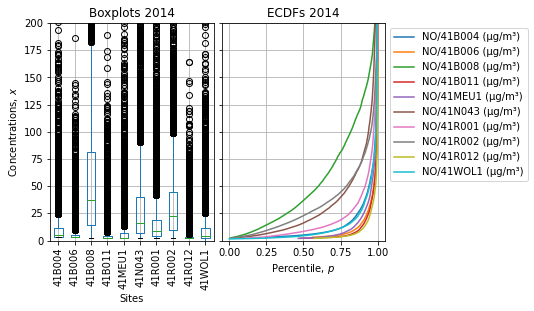

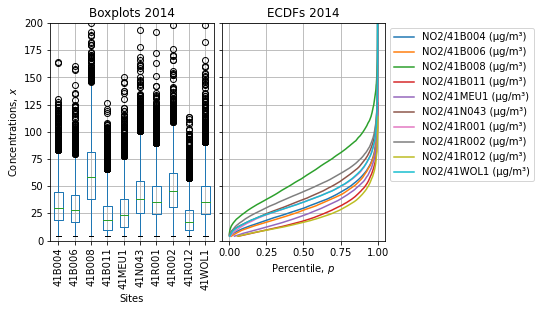

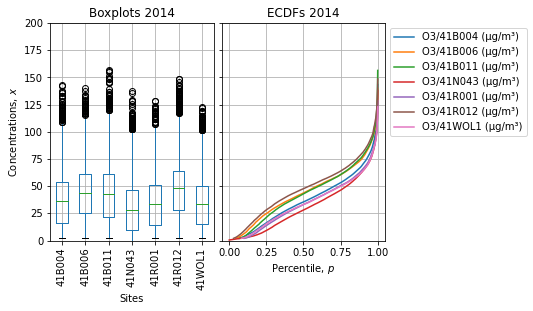

In [6]:
scales = client.scales()
for k in ['NO', 'NO2', 'O3']:#sel.columns.levels[2]:
    fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0.05})
    # Boxplots:
    data.filter(regex='{}/'.format(k)).droplevel([0,2,3], axis=1).boxplot(rot=90, ax=axes[0])
    axes[0].set_title("Boxplots 2014")
    axes[0].set_xlabel(r"Sites")
    axes[0].set_ylabel(r"Concentrations, $x$")
    # ECDFs:
    ecdf.filter(regex='{}/'.format(k)).droplevel([1,2,3], axis=1).plot(ax=axes[1])
    axes[1].set_title("ECDFs 2014")
    axes[1].set_xlabel(r"Percentile, $p$")
    axes[1].set_ylabel(r"Concentrations, $x$")
    axes[1].set_ylim(scales[k])
    lgd = axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    axes[1].grid()